Libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
from scipy.optimize import minimize
import quantstats as qs
import matplotlib.pyplot as plt
from fredapi import Fred

In [4]:
#IRX - TBills, AGZ- Agency Securities, TFLO - Treasury Floating Rate
#repos - 39.8%, us treasury securities - 21.2%, us government agency securities 19.6%,
# floating rate securities - 19%, other assets - 0.3%


fred = Fred(api_key = 'bb2f36e64e42974f650054bf95915c16')
#Is Forward Fill acceptable?
repo_data = fred.get_series('RRPONTSYD', observation_start='2015-01-01').fillna(method='ffill')

assets = ['IRX', 'AGZ', 'TFLO']
START = dt.date(2015,1,1)
END = dt.date.today() + dt.timedelta(days=1)
asset_df = yf.download(assets, start=START, end=END,progress=False)

C:\Users\andre\AppData\Local\Temp\ipykernel_3132\2982196367.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  repo_data = fred.get_series('RRPONTSYD', observation_start='2015-01-01').fillna(method='ffill')
c:\Users\andre\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\andre\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\andre\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be remove

In [30]:
asset_df.tail()

Adj Close                      Close                       High  \
                   AGZ IRX       TFLO         AGZ IRX       TFLO         AGZ   
Date                                                                           
2024-09-23  110.599998 NaN  50.560001  110.599998 NaN  50.560001  110.680000   
2024-09-24  110.709999 NaN  50.570000  110.709999 NaN  50.570000  110.739998   
2024-09-25  110.529999 NaN  50.580002  110.529999 NaN  50.580002  110.680000   
2024-09-26  110.529999 NaN  50.570000  110.529999 NaN  50.570000  110.720001   
2024-09-27  110.680000 NaN  50.590000  110.680000 NaN  50.590000  110.730003   

                                  Low                       Open      \
           IRX       TFLO         AGZ IRX       TFLO         AGZ IRX   
Date                                                                   
2024-09-23 NaN  50.560001  110.430000 NaN  50.549999  110.480003 NaN   
2024-09-24 NaN  50.570000  110.550003 NaN  50.560001  110.550003 NaN   
2024-09-25 NaN  50.580002  110.480003 NaN  50.570000  110.610001 NaN   
2024-09-26 NaN  50.580002  110.419998 NaN  50.570000  110.570000 NaN   
2024-09-27 NaN  50.599998  110.419998 NaN  50.590000  110.639999 NaN   

                      Volume               
                 TFLO    AGZ IRX     TFLO  
Date                                       
2024-09-23  50.549999  15700 NaN  1797400  
2024-09-24  50.560001  12100 NaN  1876900  
2024-09-25  50.570000  20400 NaN   975800  
2024-09-26  50.570000  13700 NaN  1301200  
2024-09-27  50.590000   9700 NaN  2162400

In [20]:
returns = asset_df['Adj Close']

2015-01-01        NaN
2015-01-02     42.186
2015-01-05    164.177
2015-01-06    149.885
2015-01-07    143.749
dtype: float64


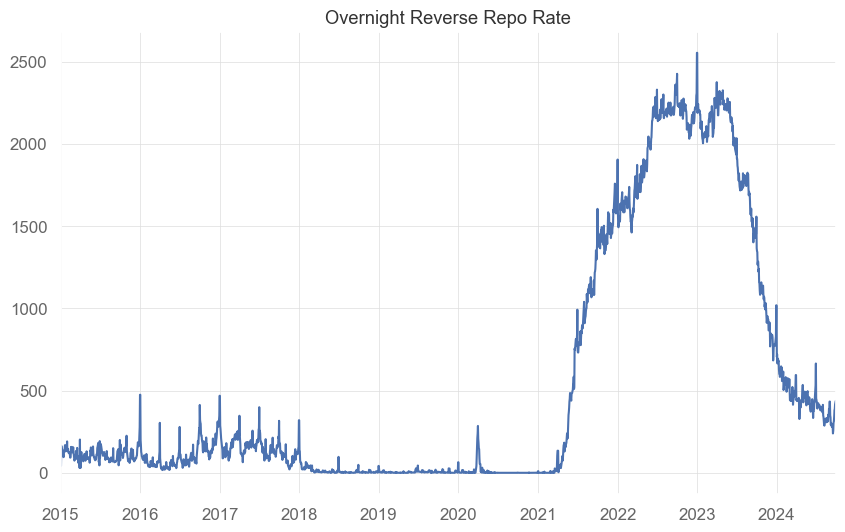

In [10]:
# Display the data
print(repo_data.head())


# Plot the data
repo_data.plot(title='Overnight Reverse Repo Rate')
plt.show()

In [25]:
repo = pd.DataFrame(repo_data).reset_index()
repo.columns = ['datetime', 'Annualized Returns']
repo['datetime'] = pd.to_datetime(repo['datetime'])
repo = repo.set_index('datetime')
repo = repo.iloc[1:]
print(repo.size)

2541


In [28]:
returns.insert(3, 'Annualized Returns', repo)
# returns['Repo Annual Rate'] = repo.index
# returns.head()

In [29]:
returns

,AGZ,IRX,TFLO,Annualized Returns
Date,,,,
2015-01-02,93.950638,0.046,42.871643,42.186
2015-01-05,93.983734,0.042,42.871643,164.177
2015-01-06,94.306801,0.041,42.871643,149.885
2015-01-07,94.364815,0.060,42.786053,143.749
2015-01-08,94.638199,0.040,42.845978,124.293
...,...,...,...,...
2024-09-23,110.599998,NaN,50.560001,380.372
2024-09-24,110.709999,NaN,50.570000,388.977
2024-09-25,110.529999,NaN,50.580002,416.193
